# QQ-Plot

## Lets understand QQ-Plot

* Quantile-Quantile (QQ) plot is a probability plot which is a graphical method for comparing two probability distributions by plotting their quantiles against each other.

## How to draw QQ plots:

1.     Sort both the Random Variables in ascending order and compute the percentiles of the random variables.
2.     Take 100 percentiles of both random variables and form pairs and plot these points.
3.     If all these points are on straight line then we can say both variables follow the same distribution.

<font color = 'red'><b>Note:</b></font> when we increase the number of points in the distributions if both distributions are similar then linearity increases else non linearity increases 





## Lets plot for 100 samples

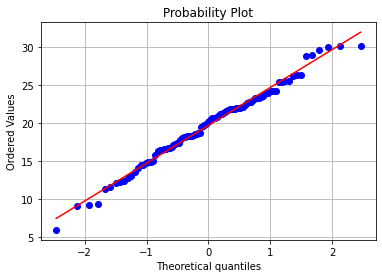

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
x = np.random.normal(loc = 20, scale = 5, size=100)
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

### lets plot for 1000 samples

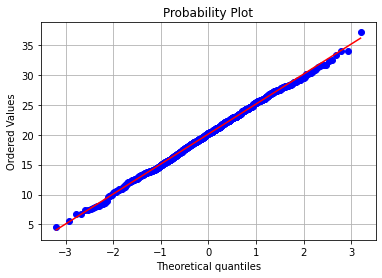

In [9]:
x = np.random.normal(loc = 20, scale = 5, size=1000)
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

### Lets take test Random Variable with exponential distribution and test with normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


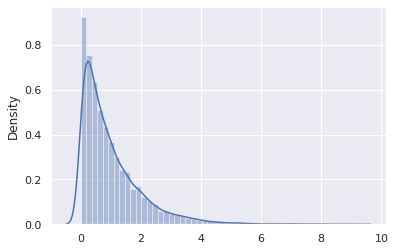

In [13]:

# Ref: #https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html
# real-world example: "The time it takes before your next telephone call" ---Wiki [https://en.wikipedia.org/wiki/Exponential_distribution#Occurrence_and_applications]
x = np.random.exponential(scale=1.0, size=10000) # scale a.k.a lambda on wiki [https://en.wikipedia.org/wiki/Exponential_distribution]

# plot PDF(X)

sns.set()
ax = sns.distplot(x)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


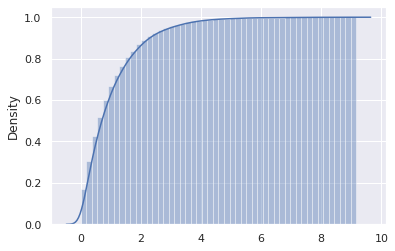

In [14]:
# plot CDF(X)
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)


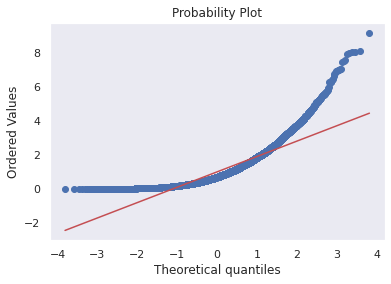

In [15]:
#QQ-Plot
stats.probplot(x, dist="norm", plot=plt)
plt.grid()

* Above it is clealy evident that QQ plot is not a straight line hence both distributions are not similar

# Transformation of sampled data to gaussian

* Normal distribution is regarded as ideal distribution and it is often assumed by many statistical methods, hence it is often a practice to convert data from a random distribution to normal distribution when ever possible.

* Commonly used transformations are

1. BOX-COX transformation
2. YEO-JHONSON transformation
3. QUANTILE transormation

## Box-cox Transform

* We generally expect the numerical features to follow gaussian distribution because most of the ML models work on the assumption that all the numerical features in the data follow gaussian distribution.

* Power Transform is a data transformation technique used to stabilize variance, make the data more like a normal distribution and improve the validity of measures of association between variables and for other stabilization procedures. One such popular transform is Box Cox Transform.

* Box Cox transform is a power transform technique used to convert a non-gaussian distribution into a gaussian distribution.

### Procedure of BOX-COX Transform:

* Let X be any distributed RV 
* When we apply box-cox transformation on Random Variable X we get ‘λ’.

* BOX-COX(X) = λ
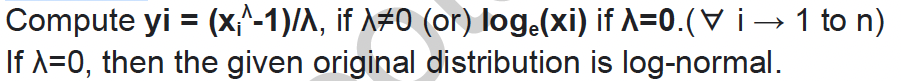
 
* finding the best ‘λ’ using the data we currently have. If the data we have is a good representative sample of all the possible values, the ‘λ’ we computed using the current data would be reasonably good for future unseen data also.
￼
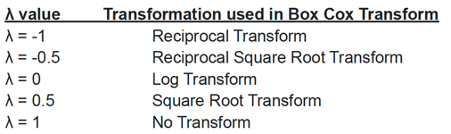

* Box – Cox is used only when all the values are positive in the R.V. 

Referance: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html#scipy.stats.boxcox

0.26804004858125563


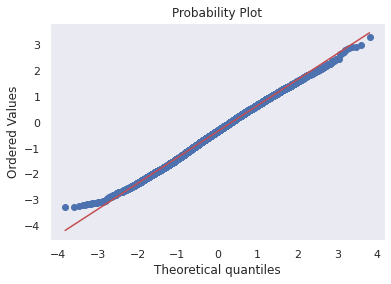

In [17]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x = np.random.exponential(scale=1.0, size=10000)
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)
#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

Exponential plot of x

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


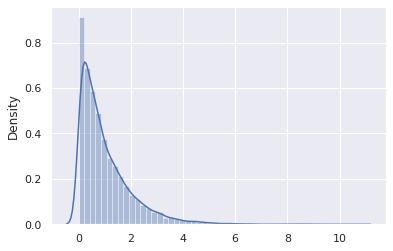

In [18]:
sns.set()
ax = sns.distplot(x)
plt.show()

Plot of transformed x

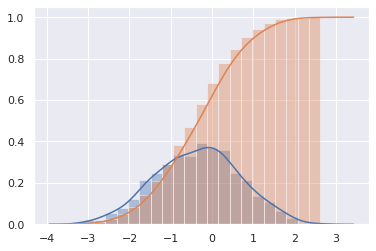

In [ ]:
# PDF of x_t
sns.set()
sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

lets try for pareto distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


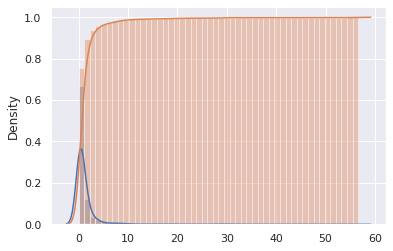

In [19]:
# Pareto distributed data
# https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.pareto.html
x = np.random.pareto(a=2.0, size=1000) 

# PDF of x
sns.set()
ax = sns.distplot(x)

#CDF of x
kwargs = {'cumulative': True}
sns.distplot(x, hist_kws=kwargs, kde_kws=kwargs)


Lets transform the pareto distribution using box-cox and plot

0.07600367431310487


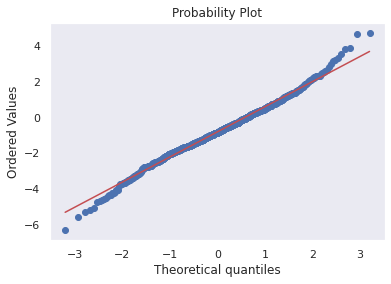

In [20]:
#Box-cox
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
x_t, l = stats.boxcox(x) # l=lambda, x_t =x tranformed by box-cox
print(l)

#QQ-Plot
stats.probplot(x_t, dist="norm", plot=plt)
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


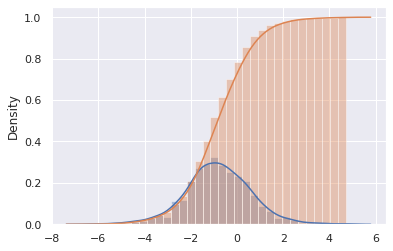

In [21]:
# PDF of x_t
sns.set()
ax = sns.distplot(x_t)

#CDF of x_t
kwargs = {'cumulative': True}
sns.distplot(x_t, hist_kws=kwargs, kde_kws=kwargs)

# YEO_JHONSON Transformation

* box-cox only works for positive values.
* The Yeo–Johnson transformation allows also for zero and negative values of y. λ can be any real number, where λ = 1 produces the identity transformation. The transformation law reads:

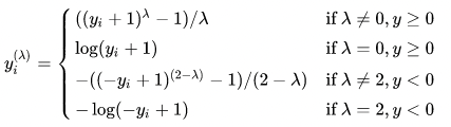


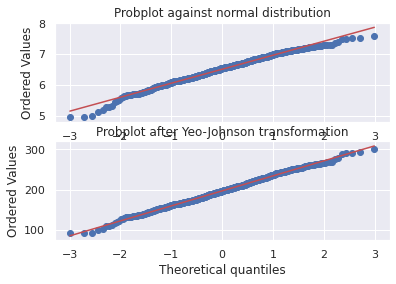

In [27]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, lmbda = stats.yeojohnson(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()


## We can use sklearn preprocessing module for this box-cox or yeo jhonson transformations also

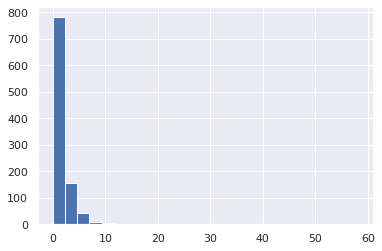

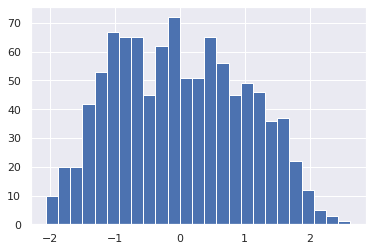

In [37]:
# demonstration of the power transform on data with a skew
#credit https://machinelearningmastery.com/power-transforms-with-scikit-learn/
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True) # for box-cox we use 'box-cox' for method variable
data_trans = power.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

Lets try it in the dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

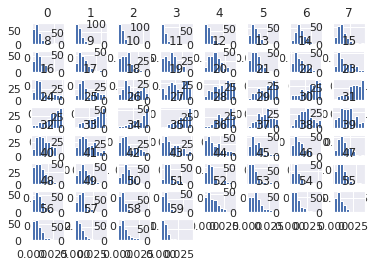

In [31]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

After applying power transformtion


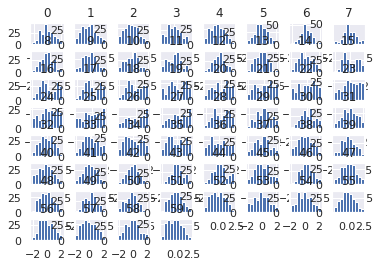

In [36]:
import pandas as pd
data = dataset.values[:, :-1]
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

# QUANTILE transformation

* reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.quantile_transform.html
* https://machinelearningmastery.com/quantile-transforms-for-machine-learning/#:~:text=Quantile%20transforms%20are%20a%20technique,the%20performance%20of%20predictive%20models.

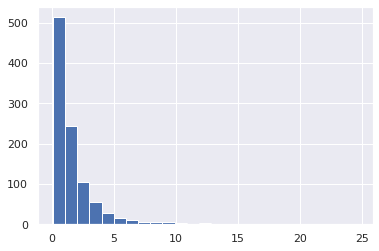

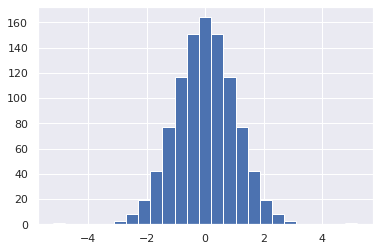

In [38]:
from sklearn.preprocessing import QuantileTransformer
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

lets apply it on the sonar dataset

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

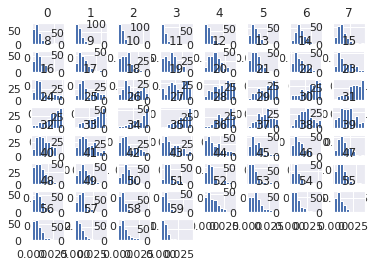

In [39]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

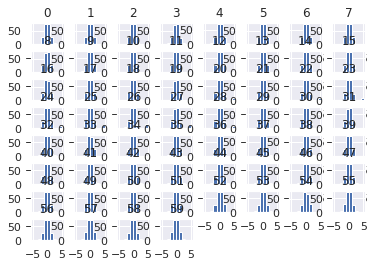

In [41]:
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = pd.DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()